# 1.Understanding the Data:

> Import necessary libraries (e.g., pandas, matplotlib, seaborn).

> Load the COVID-19 dataset.

> Display basic information about the dataset (e.g., data types, missing values).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('covid_19_data.csv')
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [3]:
df.info

<bound method DataFrame.info of            SNo ObservationDate     Province/State  Country/Region  \
0            1      01/22/2020              Anhui  Mainland China   
1            2      01/22/2020            Beijing  Mainland China   
2            3      01/22/2020          Chongqing  Mainland China   
3            4      01/22/2020             Fujian  Mainland China   
4            5      01/22/2020              Gansu  Mainland China   
...        ...             ...                ...             ...   
306424  306425      05/29/2021  Zaporizhia Oblast         Ukraine   
306425  306426      05/29/2021            Zeeland     Netherlands   
306426  306427      05/29/2021           Zhejiang  Mainland China   
306427  306428      05/29/2021    Zhytomyr Oblast         Ukraine   
306428  306429      05/29/2021       Zuid-Holland     Netherlands   

                Last Update  Confirmed  Deaths  Recovered  
0           1/22/2020 17:00        1.0     0.0        0.0  
1           1/22/20

# 2. Data Cleaning:

> Handle missing values

> Convert data types if necessary ( ObservationDate    datetime64[ns]) change to datetime

> Check for duplicates

In [4]:
df.isna().sum()

SNo                    0
ObservationDate        0
Province/State     78103
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [5]:
df.fillna(0, inplace=True)

In [6]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

In [7]:
print("Number of duplicates:", df.duplicated().sum())

Number of duplicates: 0


# 3. Descriptive Statistics:

> Generate descriptive statistics (mean, median, min, max) for numeric columns.

> Explore summary statistics for categorical columns.

In [8]:
print("\nDescriptive Statistics for Numeric Columns:")
df.describe()


Descriptive Statistics for Numeric Columns:


,SNo,ObservationDate,Confirmed,Deaths,Recovered
count,306429.000000,306429,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,2020-11-06 01:54:54.146441728,8.567091e+04,2036.403268,5.042029e+04
min,1.000000,2020-01-22 00:00:00,-3.028440e+05,-178.000000,-8.544050e+05
25%,76608.000000,2020-07-30 00:00:00,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,2020-11-10 00:00:00,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,2021-02-18 00:00:00,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,2021-05-29 00:00:00,5.863138e+06,112385.000000,6.399531e+06
std,88458.577156,NaN,2.775516e+05,6410.938048,2.015124e+05


In [9]:
print("\nSummary Statistics for Categorical Columns:")
df.describe(include=['object'])


Summary Statistics for Categorical Columns:


,Province/State,Country/Region,Last Update
count,306429,306429,306429
unique,737,229,1905
top,0,Russia,2021-04-02 15:13:53
freq,78103,30251,239885


# 4. Time Series Analysis:

> Analyze the trends in confirmed, deaths, and recovered cases over time.

> Create time-based visualizations.

In [10]:
df_time = df.groupby('ObservationDate').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})

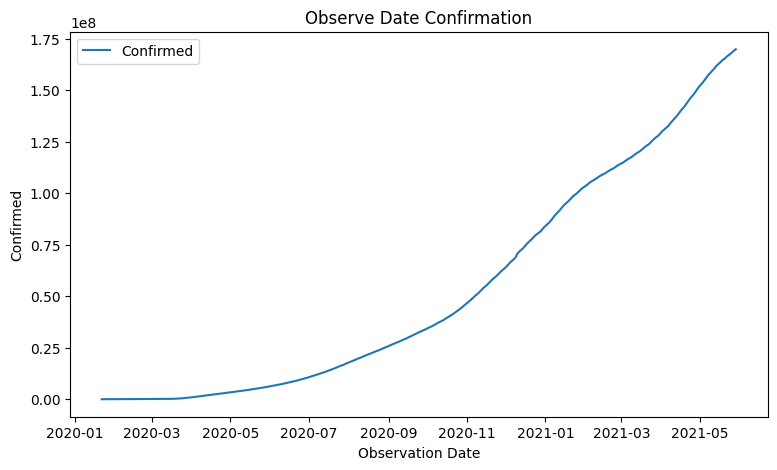

In [11]:
plt.figure(figsize = (9,5) )
sns.lineplot(data=df_time, x='ObservationDate', y='Confirmed', label='Confirmed')
plt.title('COVID-19 Time Series Analysis')
plt.xlabel('Observation Date')
plt.ylabel('Confirmed')
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'legends'

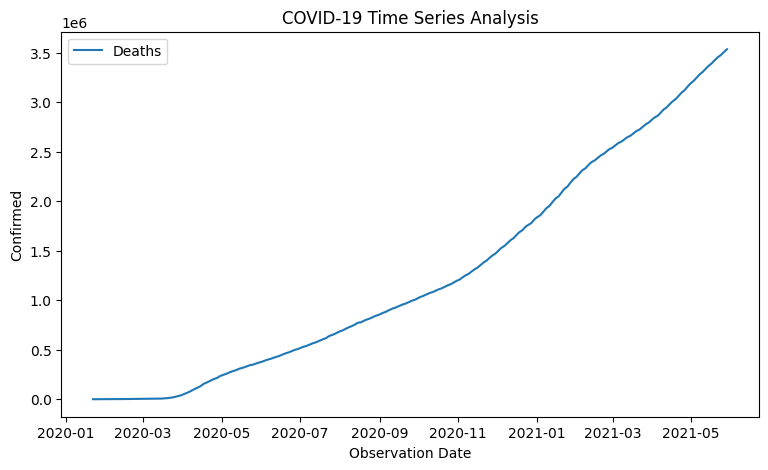

In [20]:
plt.figure(figsize = (9,5) )
sns.lineplot(data=df_time, x='ObservationDate', y='Deaths', label='Deaths')
plt.title('COVID-19 Time Series Analysis')
plt.xlabel('Observation Date')
plt.ylabel('Confirmed')
plt.legends()
plt.show()

# 5. Geographical Analysis:

> Analyze the distribution of cases across different countries/regions.

> Create geographical visualizations (e.g., world map).

In [13]:
df_country = df.groupby('Country/Region').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})

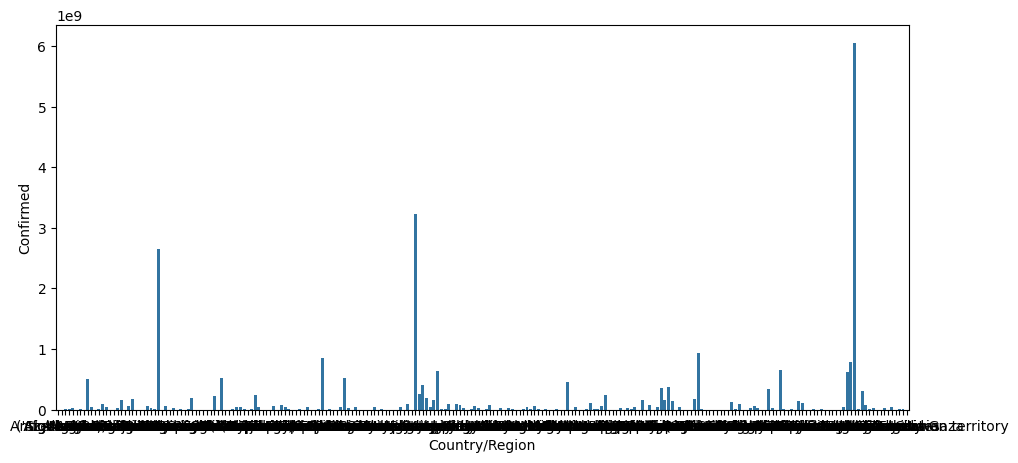

In [14]:
plt.figure(figsize = (11,5))
sns.barplot(x=df_country.index, y='Confirmed', data=df_country)
plt.show()

# 6. Correlation Analysis:

> Correlation analysis between confirmed,deaths and recovered

> Plot correlation on heat map

In [15]:
correlation = df[['Confirmed', 'Deaths', 'Recovered']].corr()

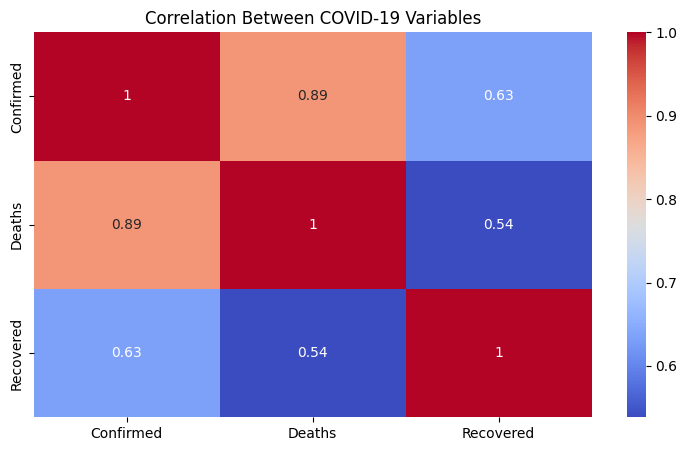

In [16]:
plt.figure(figsize=(9, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between COVID-19 Variables')
plt.show()

# 7. Advanced Analysis:

> Calculate the total number of confirmed cases, deaths, and recoveries for each country/region.

> Identify the countries/regions with the highest number of confirmed cases, deaths, and recoveries.

> Visualize the distribution of deaths using bar chart

In [17]:
total_cases = df.groupby('Country/Region').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})
total_cases

,Confirmed,Deaths,Recovered
Country/Region,,,
Azerbaijan,1.0,0.0,0.0
"('St. Martin',)",2.0,0.0,0.0
Afghanistan,17026442.0,669075.0,13464399.0
Albania,19768869.0,375955.0,13945256.0
Algeria,27684358.0,834464.0,18959299.0
...,...,...,...
West Bank and Gaza,41819444.0,440378.0,37003116.0
Yemen,962066.0,237613.0,506523.0
Zambia,13493953.0,205990.0,12625626.0


In [18]:
top_confirmed = total_cases.nlargest(10, 'Confirmed')
top_deaths = total_cases.nlargest(10, 'Deaths')
top_recovered = total_cases.nlargest(10, 'Recovered')

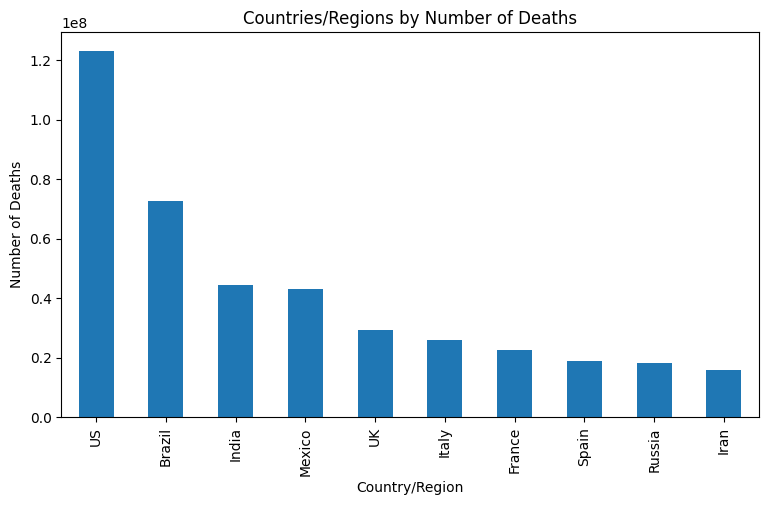

In [19]:
plt.figure(figsize=(9, 5))
top_deaths['Deaths'].plot(kind='bar')
plt.xlabel('Country/Region')
plt.ylabel('Number of Deaths')
plt.title('Countries/Regions by Number of Deaths')
plt.show()